In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv


In [41]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv')

In [32]:
df.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
df.duplicated().sum()

25

In [13]:
df.shape

(1030, 9)

In [12]:
df[df.duplicated()].sort_values(by='cement')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
892,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
943,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
933,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
766,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(1005, 9)

In [23]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [19]:
# We will apply transformation if we see that the data is not normally distributed

In [26]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [33]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

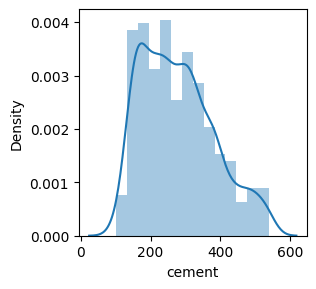

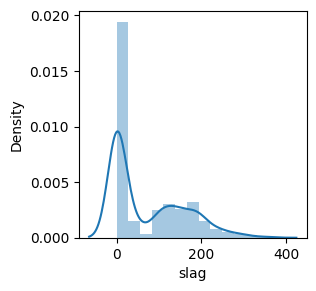

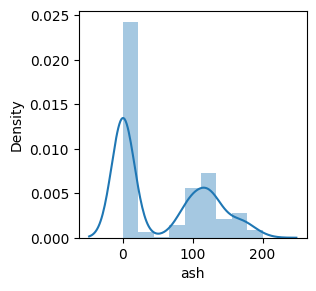

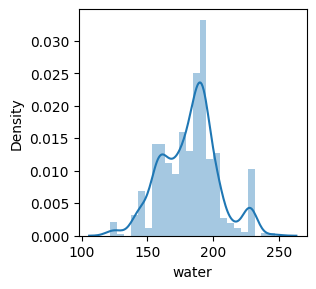

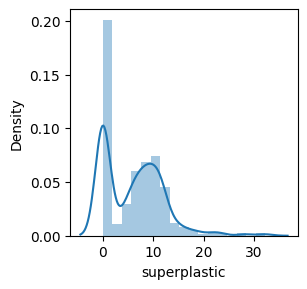

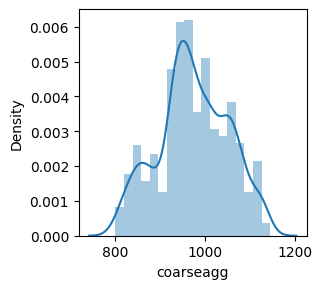

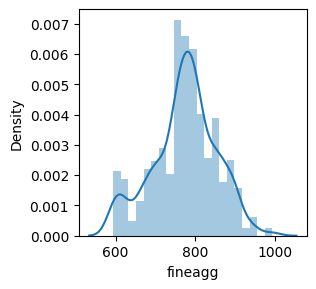

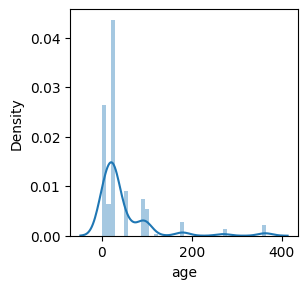

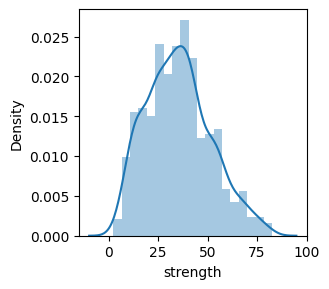

In [48]:
# since all my columns are numerical I can directly apply distplot and QQ plot to see if they are normally distributed

j = 1 

for i in df.columns:
    plt.figure(figsize=(10,10))
    plt.subplot(3,3,j)
    sns.distplot(df[i])
    plt.show()
    j += 1

In [50]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.0000000,1005.0000000,1005.0000000,1005.0000000,1005.0000000,1005.0000000,1005.0000000,1005.0000000,1005.0000000
mean,278.6313433,72.0434826,55.5363184,182.0753234,6.0332338,974.3768159,772.6882587,45.8567164,35.2503781
std,104.3442607,86.1708070,64.2079686,21.3393341,5.9199667,77.5796667,80.3404346,63.7346917,16.2848154
min,102.0000000,0.0000000,0.0000000,121.8000000,0.0000000,801.0000000,594.0000000,1.0000000,2.3300000
25%,190.7000000,0.0000000,0.0000000,166.6000000,0.0000000,932.0000000,724.3000000,7.0000000,23.5200000
50%,265.0000000,20.0000000,0.0000000,185.7000000,6.1000000,968.0000000,780.0000000,28.0000000,33.8000000
75%,349.0000000,142.5000000,118.3000000,192.9000000,10.0000000,1031.0000000,822.2000000,56.0000000,44.8700000
max,540.0000000,359.4000000,200.1000000,247.0000000,32.2000000,1145.0000000,992.6000000,365.0000000,82.6000000


In [51]:
# since min value for three cols is zero we need to manipulate Box Cox Trnsfrmr

# First training model without transformation 

In [57]:
X = df.drop(['strength'], axis = 1)
y = df['strength']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = lr.predict(X_test)

In [69]:
print("Accuracy : ", np.mean(cross_val_score(lr, X, y, cv=10)))

Accuracy :  0.5770200892206294


In [70]:
# Now applying box-cox transformation to data

In [76]:
pt = PowerTransformer(method='box-cox')
X_transformed  = pt.fit_transform(X+0.000000001)

In [77]:
lr = LinearRegression()

In [78]:
lr.fit(X_transformed, y)

LinearRegression()

In [80]:
print("Accuracy after transformation : ", np.mean(cross_val_score(lr, X_transformed, y, cv=10)))

Accuracy after transformation :  0.7821743329872624
